In [1]:
import pandas as pd #import pandas as library
import numpy as np #import numpy as library
import matplotlib.pyplot as plt #import matplotlib as library


In [2]:
dataset = pd.read_csv("student_scores.csv") #loading dataset

In [3]:
dataset #calling dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
dataset.shape #checking shape of dataset

(25, 2)

In [5]:
dataset.head() #calling first 5 entries of dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
dataset.describe() #describing dataset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


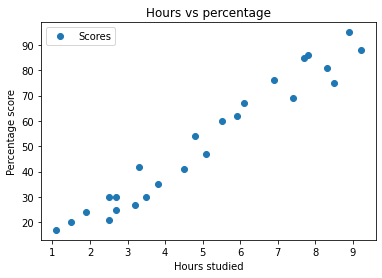

In [27]:
dataset.plot(x="Hours",y="Scores",style="o") #plotting dataset


plt.title('Hours vs percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

In [42]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values  #creating variables 



In [53]:
X
    

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [66]:
from sklearn.model_selection import train_test_split #importing sklearn for training machine
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0) #dividing data into test and train

In [67]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)



LinearRegression()

In [68]:
print(regressor.intercept_)

2.018160041434662


In [69]:
print(regressor.coef_)

[9.91065648]


In [70]:
y_pred = regressor.predict(X_test)

In [71]:
df = pd.DataFrame({'Actual':y_test, 'Prediction':y_pred})
df

,Actual,Prediction
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [72]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


In [73]:
import pickle
data = {'model':regressor , "hours":X_train}
with open('saved_steps.pkl','wb') as file:
    pickle.dump(data,file)

In [74]:
with open('saved_steps.pkl','rb') as file:
    data = pickle.load(file)
regressor_loaded = data['model']
hours = data['hours']


In [19]:
print(X_train[0])

[3.8]


In [79]:
y_pred = regressor_loaded.predict(X_train)
print(y_pred)

[39.67865467 20.84840735 79.32128059 70.40168976 12.91988217 52.56250809
 78.33021494 34.72332643 84.27660883 93.19619966 62.47316457 36.70545772
 28.77693254 56.52677068 28.77693254 86.25874013 26.79480124 49.58931115
 90.22300272 46.6161142 ]


In [80]:
df1 = pd.DataFrame({'Actual':y_train, 'Prediction':y_pred})
df1

,Actual,Prediction
0,35,39.678655
1,24,20.848407
2,86,79.321281
3,76,70.401690
4,17,12.919882
5,47,52.562508
6,85,78.330215
7,42,34.723326
8,81,84.276609
9,88,93.196200


In [82]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_train,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_train,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_train,y_pred)))


Mean Absolute Error: 5.186601709180373
Mean Squared Error: 30.898182377314544
Root Mean Squared Error: 5.558613350226344
